In [5]:
import numpy as np
import matplotlib.pyplot as plt
import bemcs
import solve_bem

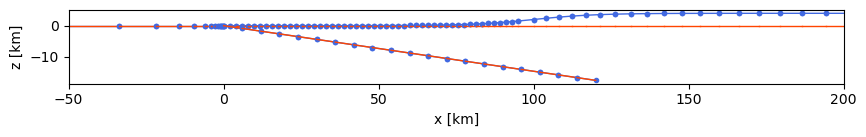

In [6]:
# Elastic parameters
mu = 1
nu = 0.25
# fault and topographic parameters
nfault = 20
fault_x = 120
dip = 10
height = 4

# construct fault with topography
els, labels, bctype, bc_x, bc_y = solve_bem.construct_topographymesh(
    height, dip, fault_x, nfault
)

# construct fault with flat topography
els_flat, _, _, _, _ = solve_bem.construct_topographymesh(0, dip, fault_x, nfault)

plt.figure(figsize=(10, 4))
for i in np.arange(len(els.x1)):
    plt.plot(
        [els.x1[i], els.x2[i]],
        [els.y1[i], els.y2[i]],
        ".-",
        linewidth=1,
        color="royalblue",
    )
    plt.plot(
        [els_flat.x1[i], els_flat.x2[i]],
        [els_flat.y1[i], els_flat.y2[i]],
        "-",
        linewidth=1,
        color="orangered",
    )
plt.xlim([-50, 200])
plt.xlabel("x [km]")
plt.ylabel("z [km]")
# plt.legend(["topography"])
plt.gca().set_aspect("equal", adjustable="box")
plt.show()

# Solve system

In [7]:
# for case with topography
_, qcoefs_s, qcoefs_n = solve_bem.setup_and_solve_bem(
    els, labels, bctype, bc_x, bc_y, mu, nu
)

# for flat topography case
_, qcoefs_s_flat, qcoefs_n_flat = solve_bem.setup_and_solve_bem(
    els_flat, labels, bctype, bc_x, bc_y, mu, nu
)

Number of open nodes = 3
: [array([0]), array([446]), array([386])]
Number of 2-overlap nodes = 146
: [array([ 3, -2]), array([ 6, -5]), array([ 9, -8]), array([ 12, -11]), array([ 15, -14]), array([ 18, -17]), array([ 21, -20]), array([ 24, -23]), array([ 27, -26]), array([ 30, -29]), array([ 33, -32]), array([ 36, -35]), array([ 39, -38]), array([ 42, -41]), array([ 45, -44]), array([ 48, -47]), array([ 51, -50]), array([ 54, -53]), array([ 57, -56]), array([ 63, -62]), array([ 66, -65]), array([ 69, -68]), array([ 390, -389]), array([ 72, -71]), array([ 75, -74]), array([ 78, -77]), array([ 393, -392]), array([ 81, -80]), array([ 84, -83]), array([ 87, -86]), array([ 396, -395]), array([ 90, -89]), array([ 93, -92]), array([ 96, -95]), array([ 399, -398]), array([ 99, -98]), array([ 102, -101]), array([ 105, -104]), array([ 402, -401]), array([ 108, -107]), array([ 111, -110]), array([ 114, -113]), array([ 405, -404]), array([ 117, -116]), array([ 120, -119]), array([ 123, -122]), a

## Plot displacement and stress components at the surface

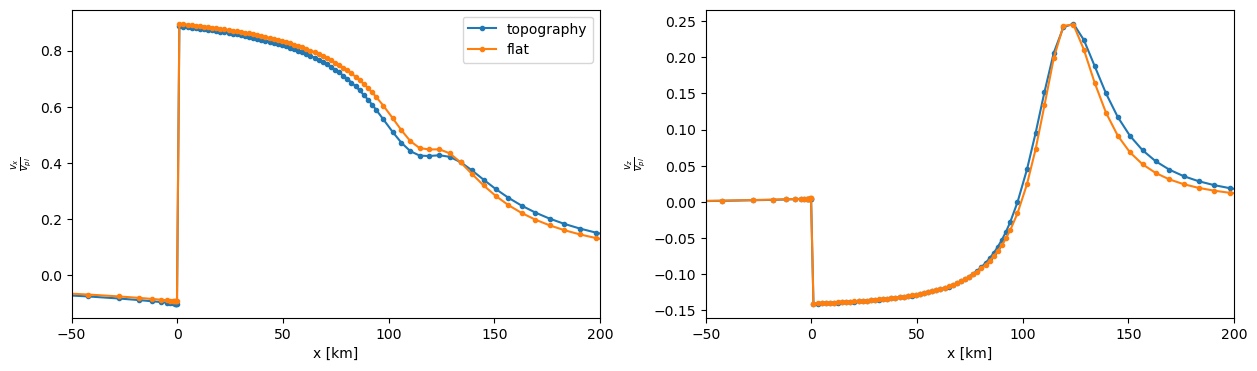

In [8]:
# first solve for case with topography
# Observation points
x_obs = (els.x_centers - els.x_normals * 1e-4)[labels == "topo"]
y_obs = (els.y_centers - els.y_normals * 1e-4)[labels == "topo"]
x_obs = x_obs.flatten()
y_obs = y_obs.flatten()

# Compute shear and tensile stress kernels
kernels_s = bemcs.get_displacement_stress_kernel(x_obs, y_obs, els, mu, nu, "shear")
kernels_n = bemcs.get_displacement_stress_kernel(x_obs, y_obs, els, mu, nu, "normal")

# Compute displacement and stresses (we will plot it later)
ux, uy, _, _, _ = bemcs.coeffs_to_disp_stress(kernels_s, kernels_n, qcoefs_s, qcoefs_n)


# next solve for case with flat topography
# Observation points
x_obs = (els_flat.x_centers - els_flat.x_normals * 1e-9)[labels == "topo"]
y_obs = (els_flat.y_centers - els_flat.y_normals * 1e-9)[labels == "topo"]
x_obs = x_obs.flatten()
y_obs = y_obs.flatten()

# Compute shear and tensile stress kernels
kernels_s = bemcs.get_displacement_stress_kernel(
    x_obs, y_obs, els_flat, mu, nu, "shear"
)
kernels_n = bemcs.get_displacement_stress_kernel(
    x_obs, y_obs, els_flat, mu, nu, "normal"
)

# Compute displacement and stresses (we will plot it later)
ux_flat, uy_flat, _, _, _ = bemcs.coeffs_to_disp_stress(
    kernels_s, kernels_n, qcoefs_s_flat, qcoefs_n_flat
)

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(x_obs, ux, ".-", label="topography")
plt.plot(x_obs, ux_flat, ".-", label="flat")
plt.legend()
plt.xlabel("x [km]")
plt.ylabel("$\\frac{v_x}{v_{pl}}$")
plt.xlim([-50, 200])
plt.subplot(1, 2, 2)
plt.plot(x_obs, uy, ".-")
plt.plot(x_obs, uy_flat, ".-")
plt.xlabel("x [km]")
plt.ylabel("$\\frac{v_z}{v_{pl}}$")
plt.xlim([-50, 200])
plt.show()

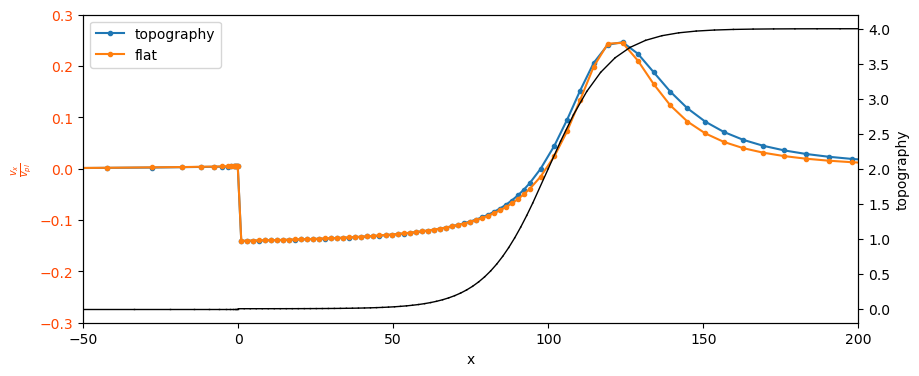

In [9]:
fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot the first line with the first y-axis
ax1.plot(x_obs, uy, ".-", label="topography")
ax1.plot(x_obs, uy_flat, ".-", label="flat")
ax1.legend(loc="upper left")
ax1.set_xlabel("x")
ax1.set_ylabel("$\\frac{v_x}{v_{pl}}$", color="orangered")
ax1.tick_params(axis="y", labelcolor="orangered")
ax1.set_xlim([-50, 200])
ax1.set_ylim([-0.3, 0.3])
# Create the second y-axis
ax2 = ax1.twinx()
for i in np.where(labels == "topo"):
    ax2.plot([els.x1[i], els.x2[i]], [els.y1[i], els.y2[i]], "k-", linewidth=1)
ax2.set_ylabel("topography", color="black")
ax2.tick_params(axis="y", labelcolor="black")